<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [ ]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
# from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
file = '/Users/ed/Downloads/making money/lambda/VSC/DS-Unit-4/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv'
DS = pd.read_csv(file, index_col=False)

# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
                
# clean markdown from raw html

In [ ]:
pip install lxml

In [3]:
print(DS.shape)
DS.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
to_clean = DS['description']
to_clean[0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [5]:
soup = BeautifulSoup(to_clean[0]).text

In [6]:
soup

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [7]:
no_html = []
for text in DS['description']:
    no_html_text = BeautifulSoup(text).text
    no_html.append(no_html_text)
DS['no_html_description'] = no_html

In [8]:
DS.head()

,Unnamed: 0,description,title,no_html_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [9]:
DS['no_html_description'][2]

"b'As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets and identify meaningful patterns that lead to actionable recommendations. You will be performing thorough testing and validation of models, and support various aspects of the business with data analytics.\\nAbility to do statistical modeling, build predictive models and leverage machine learning algorithms.\\nThis position will combine the typical Data Scientist math and analytical skills, with research, advanced business, communication, and presentation skills.\\nPrimary job location is in Sacramento, but work-from-home option is available.\\n\\nQualifications\\nBachelors, MS or PhD in a relevant field (Computer Science, Engineering, Statistics, Physics, Applied Math)\\nExperience in R and/or Python is preferred'"

## 2) Use Spacy to tokenize the listings 

In [52]:
one_description = DS['no_html_description'][0]
one_description

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [12]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [53]:
tokenize(one_description)[0:15]

['bjob',
 'requirementsnconceptual',
 'understanding',
 'in',
 'machine',
 'learning',
 'models',
 'like',
 'naixc2xa8ve',
 'bayes',
 'kmeans',
 'svm',
 'apriori',
 'linear',
 'logistic']

In [14]:
DS['tokens'] = DS['no_html_description'].apply(tokenize)

In [54]:
DS.head()

,Unnamed: 0,description,title,no_html_description,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""job, requirements:\nconceptual, understandi..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'job, description\n\nas, data, scientist, 1,..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'as, data, scientist, working, consulting, b..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, $6,756, monthcontractunder, general..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'location:, usa, \xe2\x80\x93, multiple, loc..."


In [27]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
DS['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('and', 11541),
 ('to', 6803),
 ('the', 5229),
 ('of', 4553),
 ('data', 4021),
 ('in', 3526),
 ('a', 3453),
 ('with', 3053),
 ('for', 2028),
 ('or', 1750)]

In [28]:
DS_tokens = DS['tokens']
DS_tokens[0:10]

0    [bjob, requirementsnconceptual, understanding,...
1    [bjob, descriptionnnas, a, data, scientist, 1,...
2    [bas, a, data, scientist, you, will, be, worki...
3    [b4969, 6756, a, monthcontractunder, the, gene...
4    [blocation, usa, xe2x80x93, multiple, location...
5    [bcreate, various, business, intelligence, ana...
6    [bas, spotify, premium, swells, to, over, 96m,...
7    [beverytown, for, gun, safety, the, nations, l...
8    [bms, in, a, quantitative, discipline, such, a...
9    [bslack, is, hiring, experienced, data, scient...
Name: tokens, dtype: object

In [29]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [30]:
tokenizer = Tokenizer(nlp.vocab)

In [20]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [56]:
# word 'data' removed

STOP_WORDS = nlp.Defaults.stop_words.union(['and', 'data', 'a', 'i', 'to', 'I', ' ', ' -', '-', '1', 'date', '/', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this',])

In [57]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [58]:
wc = count(DS['tokens'])
wc[0:5]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,data,419,3751,1.0,0.029842,0.029842,0.983568
144,business,303,1008,2.0,0.008019,0.037861,0.711268
53,experience,357,941,3.0,0.007486,0.045348,0.838028
26,work,326,876,4.0,0.006969,0.052317,0.765258
97,team,314,726,5.0,0.005776,0.058093,0.737089


In [59]:
# Tokenizer Pipe for reviews


tokens = []


""" Make them tokens """
for doc in tokenizer.pipe(DS['no_html_description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
DS['tokens'] = tokens

In [60]:
wc = count(DS['tokens'])
wc[0:5]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
143,business,303,1008,1.0,0.008266,0.008266,0.711268
52,experience,357,941,2.0,0.007717,0.015983,0.838028
26,work,326,876,3.0,0.007184,0.023166,0.765258
96,team,314,726,4.0,0.005954,0.029120,0.737089
45,machine,269,660,5.0,0.005412,0.034532,0.631455


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [61]:
doc = nlp(one_description)
doc

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"

In [62]:
DS.shape

(426, 5)

In [63]:
len(DS['no_html_description'])

426

In [64]:
data = DS['no_html_description']

In [65]:
data[0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [66]:
##### Your Code Here #####
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

# Word counts
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.shape

(426, 9816)

In [89]:
print(dtm)

      24        25   30  3rd  3rd party       40  401     401k   50       500  \
0    0.0  0.000000  0.0  0.0        0.0  0.00000  0.0  0.00000  0.0  0.000000   
1    0.0  0.000000  0.0  0.0        0.0  0.00000  0.0  0.00000  0.0  0.000000   
2    0.0  0.000000  0.0  0.0        0.0  0.00000  0.0  0.00000  0.0  0.000000   
3    0.0  0.000000  0.0  0.0        0.0  0.00000  0.0  0.00000  0.0  0.000000   
4    0.0  0.000000  0.0  0.0        0.0  0.00000  0.0  0.00000  0.0  0.000000   
..   ...       ...  ...  ...        ...      ...  ...      ...  ...       ...   
421  0.0  0.000000  0.0  0.0        0.0  0.07735  0.0  0.00000  0.0  0.040493   
422  0.0  0.000000  0.0  0.0        0.0  0.00000  0.0  0.00000  0.0  0.000000   
423  0.0  0.000000  0.0  0.0        0.0  0.00000  0.0  0.05855  0.0  0.000000   
424  0.0  0.000000  0.0  0.0        0.0  0.00000  0.0  0.00000  0.0  0.000000   
425  0.0  0.046998  0.0  0.0        0.0  0.00000  0.0  0.00000  0.0  0.000000   

     ...  your life  your m

In [ ]:
print(vect.get_feature_names())

In [67]:
dtm.head()

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Comparing to the first row of data

doc_len = [len(doc) for doc in data]

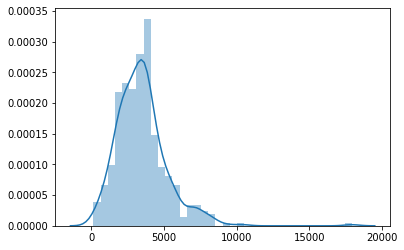

In [72]:
import seaborn as sns

sns.distplot(doc_len);

## 4) Visualize the most common word counts

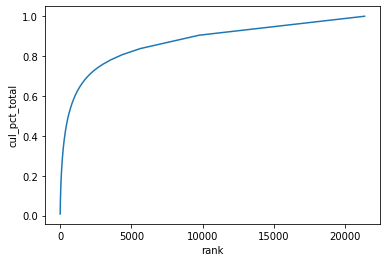

In [68]:
##### Your Code Here #####
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [69]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.08893426490848261

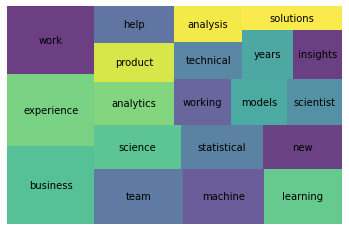

In [70]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = ['english', '10', '100', '000', '11', '12', '15', '17', '18',
                                     '19', '20', '200', '2013', '2015', '2017', '2018', '2019'],
                        # tokenizer = tokenize,
                        ngram_range = (1,2),
                        min_df = 5, 
                        max_df = 0.6,
                        # max_features = 5000
                       )

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(426, 9747)


,24,25,30,3rd,3rd party,40,401,401k,50,500,...,your life,your models,your opportunity,your own,your request,your resume,your skills,your team,your work,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.081023,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [92]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)

In [93]:
# Turn it into a DataFrame

df = pd.DataFrame(dist_matrix)

In [96]:
print(df.shape)
df.head()

(426, 426)


,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
0,1.000000,0.060699,0.018403,0.004211,0.021108,0.074541,0.011019,0.040774,0.047746,0.021096,...,0.044788,0.047272,0.036028,0.048988,0.041317,0.014389,0.014070,0.017072,0.061619,0.065467
1,0.060699,1.000000,0.055492,0.018398,0.013177,0.072345,0.092048,0.066605,0.114851,0.083123,...,0.091141,0.132299,0.042479,0.090553,0.098513,0.092711,0.056949,0.094871,0.088745,0.092581
2,0.018403,0.055492,1.000000,0.011864,0.020613,0.035005,0.045857,0.068727,0.065213,0.031373,...,0.047887,0.029162,0.040664,0.065779,0.054465,0.043718,0.012574,0.034016,0.055201,0.061355
3,0.004211,0.018398,0.011864,1.000000,0.000000,0.034412,0.024640,0.097837,0.040860,0.052922,...,0.057372,0.035446,0.007416,0.054720,0.024446,0.072728,0.019105,0.079526,0.066433,0.095149
4,0.021108,0.013177,0.020613,0.000000,1.000000,0.037132,0.021109,0.022471,0.021340,0.007769,...,0.010974,0.053706,0.060152,0.060945,0.001238,0.006418,0.003953,0.007078,0.007019,0.038929


In [97]:
# Each row is the similarity of one document to all other documents (including itself)
df[0][:5]

0    1.000000
1    0.060699
2    0.018403
3    0.004211
4    0.021108
Name: 0, dtype: float64

In [98]:
# Grab the row
df[df[0] < 1][0].sort_values(ascending=False)[:5]

168    0.126060
338    0.116903
199    0.111619
403    0.110624
399    0.105601
Name: 0, dtype: float64

In [99]:
print(data[0][:150])

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression,


In [100]:
print(data[168][:150])

b"Logistics done differently.\nAt XPO Logistics, we invest over $450 million in technology every year so that we can continue to develop state-of-the-


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [87]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [101]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.32207424, 1.32898227, 1.33295208, 1.33369838]]),
 array([[  0, 168, 338, 199, 403]]))

In [102]:
data[0][:200]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN alon'

In [104]:
data[168][:200]

'b"Logistics done differently.\\nAt XPO Logistics, we invest over $450 million in technology every year so that we can continue to develop state-of-the-art solutions for our customers. As the Data Scien'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 